## 2.1 Data

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.datasets import load_digits

(1797, 64)


<Figure size 432x288 with 0 Axes>

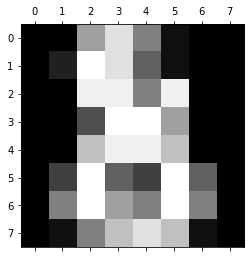

In [89]:
digits = load_digits()
print(digits.data.shape)
plt.gray()
plt.matshow(digits.images[1796])
plt.show()

In [90]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [91]:
# input_target = []
# for i in range(0,1797):
#     input_target.append((digits.images[i],digits.target[i]))

In [92]:
inputs = np.array(digits.images)
targets = np.array(digits.target)

<Figure size 432x288 with 0 Axes>

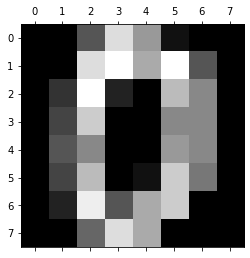

In [93]:
plt.gray()
plt.matshow(inputs[0])
plt.show()

In [94]:
reshaped_inputs = inputs.reshape(1797,64)

In [95]:
reshaped_inputs_f32 = reshaped_inputs.astype('float32')/16

In [96]:
target_array = np.zeros((1797,10))
for i in range(1797):
    target_array[i][targets[i]]=1
target_array

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [97]:
target_array[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [98]:
reshaped_inputs_f32.shape

(1797, 64)

In [99]:
input_target = []
for i in range(1797):
    input_target.append((reshaped_inputs_f32[i],target_array[i]))

In [100]:
mini_batch_size = 10

In [101]:
def generate_minibatch(input_target=input_target):
    random.shuffle(input_target)
    inputs = []
    targets = []
    for i in range(1797):
        inputs.append(input_target[i][0])
        targets.append(input_target[i][1])
    inputs_cp = inputs.copy()
    targets_cp = targets.copy()
    minibatch_input = np.array(inputs_cp[:mini_batch_size])
    minibatch_target = np.array(targets_cp[:mini_batch_size])
    
    del inputs_cp[0:mini_batch_size]
    del targets_cp[0:mini_batch_size]
    
    yield (minibatch_input,minibatch_target)

In [102]:
mini_input, mini_target = next(generate_minibatch())
initial_input_size = mini_input[1]

## 2.2 & 2.3 Sigmoid Function and Softmax Function

In [103]:
class activation_functions():
    def sigmoid(X):
        return np.exp(X) / (1+np.exp(X))
    def softmax(Z):
        return np.exp(Z) / np.sum(np.exp(Z))

## 2.4 MLP weights

In [104]:
class mlp_layer:
    def __init__(self, activation_function, perceptron_layer, input_size):
        self.activation_function = activation_function
        self.perceptron_layer = perceptron_layer
        self.input_size = input_size
    def attributes(self, minibatch_size = mini_batch_size):
        W=np.random.normal(0,0.2,size=(minibatch_size, self.input_size))
        b=np.zeros(shape=(minibatch_size,1))
        return W,b
    def forward_function(self, X):
        activation_values = []
        for i in range(self.perceptron_layer):
            W,b = self.attributes()
            Z = W.dot(X) + b
            if((activation_function == 'sigmoid') or (activation_function == 'Sigmoid')):
                activation_values.append(self.activation_functions.sigmoid(Z))
            elif((activation_function == 'softmax') or (activation_function == 'Softmax')):
                activation_values.append(self.activation_functions.softmax(Z))
        return np.array(activation_values)

## 2.5 Putting together the MLP 

In [105]:
class mlp:
    def __init__(self, no_of_layers, size_of_layer, layer_activation_function_string_list):
        self.no_of_layers = no_of_layers
        self.size_of_layer = size_of_layer
        self.layer_activation_function_string_list = layer_activation_function_string_list
        
    def mlp_final_calculation(self, X, initial_input_size = initial_input_size):
        outputs_list = []
        input_size_list = []
        outputs_list.append(X)
        input_size_list.append(initial_input_size)
        for i in range(self.no_of_layers):
            mlp_layer_i_output = mlp_layer(self.layer_activation_function_string_list[i], self.size_of_layer[i], input_size_list[-1]).forward_function(outputs_list[-1])
            outputs_list.append(mlp_layer_i_output)
            input_size_list.append(mlp_layer_i_output.shape[0])
        return outputs_list

## 2.6 CCE Loss Function

In [106]:
class loss_function:
    def cce_loss(actual_output,predicted_output):
        return ((-1/minibatch_size)*np.sum(actual_output.dot(predicted_output)))